## Submit job

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "chevron_pattern"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e84c3-028d-7e0b-8000-bef9b60c4832
job_status = succeeded  elapsed=48.965
sample: [{'time_range': [0.0, 16.0, 32.0, 48.0, 64.0, 80.0, 96.0, 112.0, 128.0, 144.0, 160.0, 176.0, 192.0], 'detuning_range': [-0.03, -0.024, -0.018, -0.012, -0.006, 0.0, 0.006, 0.012, 0.018, 0.024, 0.03], 'frequencies': {'Q08': 8.195345886548736}, 'chevron_data': {'Q08': [[1.1124260425567627, 1.0201300382614136, 1.0066640377044678, 1.0761059522628784, 0.997223973274231, 1.14411199092865, 1.050516963005066, 1.0589829683303833, 1.0905139446258545, 1.1415940523147583, 1.054286003112793], [0.7785829901695251, 0.5937979817390442, 0.4793210029602051, 0.3713180124759674, 0.3543980121612549, 0.47052499651908875, 0.48777198791503906, 0.4782949984073639, 0.4842720031738281, 0.7041940093040466, 0.9067779779434204], [0.9758740067481995, 1.0632339715957642, 0.5565339922904968, 0.07139699906110764, -0.5623769760131836, -0.7221919894218445, -0.3901219964027405, 0.022791000083088875, 0.509922981262207, 1.01902997493

## Plot

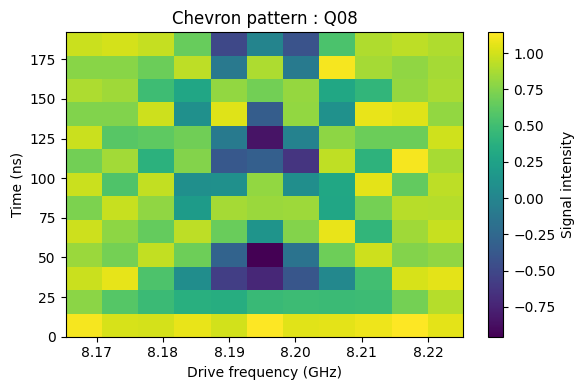

In [2]:
from oqtopus_sse_pulse.plotters import plot_payload

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)